In [50]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import defaultdict
from scipy.optimize import curve_fit
# Use scipy to fit the data to the power law 
rng = np.random.default_rng() # Intilize a random number generator 

In [43]:
# Ball class 
class Ball:
    def __init__(self, id_=1, state=10, status=True):
        self.id_ = id_
        self.state = state 
        self.init_state = state 
        self.status = status 
    def reset(self):
        self.state = self.init_state 
    def eliminate(self):
        self.status = False 
    def check(self):
        if self.state == 1:
            self.status = False

In [82]:
# Standard SSR 
# Code here
# A ball starts at the highest state i=N
# With uniform probability it can jump to any lower state j < i
# If the ball reachs the ground state i=1 it is reset 
N = 10_000 # Number of states 
max_iter = 100_000 # Maximum number of iterations 
# Intilizing a ball 
b = Ball(state=N) 

visits = defaultdict(int) # Store the states as keys and the number they ot visited as values of a dictionary 

for _ in range(max_iter):
    # If the ball is in the ground state reset the state to the intial state (highest)
    if b.state == 1:
        b.reset()
    else:
        next_state = rng.choice(range(1, b.state)) # Generate the next state randomly 
        visits[next_state]+=1 # Increase the count if visits of the choosen state 
        b.state = next_state # Update the state of the ball
# Normlizing the frequencies of visits 
visits = {k:v/ sum(visits.values()) for k, v in visits.items()}

visits = dict(sorted(visits.items()))

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'randint'

In [61]:
# Fit the data to Zipf's law 
def zipf(x, a, b):
    return a / x ** b
x_data = np.array(list(visits.keys()))
y_data = np.array(list(visits.values()))

popt, pcov = curve_fit(zipf, x_data, y_data)

In [114]:
print("The fitted paramters of the model are: ")
print(f"C={popt[0]}")
print(f"a={popt[1]}")

The fitted paramters of the model are: 
C=0.036574201582298724
a=0.8158562939382993


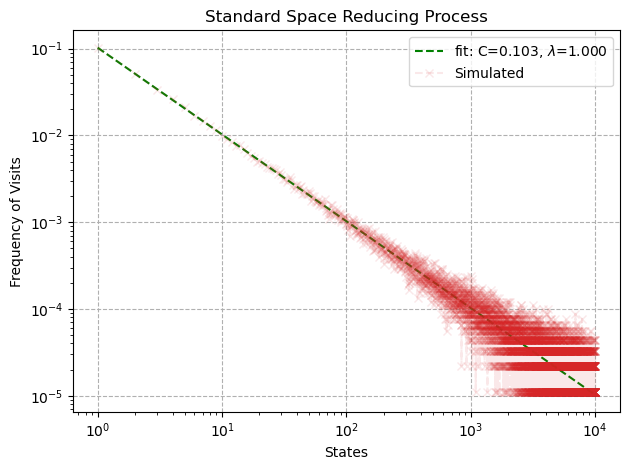

In [67]:
# plt.bar(visits.keys(), visits.values())
plt.plot(x_data, zipf(x_data, *popt), "g--", label=r'fit: C=%5.3f, $\lambda$=%5.3f' % tuple(popt))
plt.plot(visits.keys(), visits.values(), ls="--", marker="x", color="tab:red", alpha=0.1,label="Simulated")
plt.xticks(list(visits.keys()))
plt.xlabel("States")
plt.ylabel("Frequency of Visits")
plt.yscale("log")
plt.xscale("log")
plt.grid(True, ls="--")
plt.title("Standard Space Reducing Process")
plt.legend(loc="best")
plt.tight_layout()

# plt.savefig("std_ssr_loglog.png")
plt.show()

In [107]:
# Noisy SSR
# Code here 
# Standard SSR 
# Code here
# A ball starts at the highest state i=N
# With uniform probability it can jump to any lower state j < i
# If the ball reachs the ground state i=1 it is reset 
N = 10_000 # Number of states 
max_iter = 100_000 # Maximum number of iterations 
# Intilizing a ball 
b = Ball(state=N) 
# The probability of going to a lower state 
lam = 0.8 

visits = defaultdict(int) # Store the states as keys and the number they ot visited as values of a dictionary 

for _ in range(max_iter):
    u = rng.random()  # Generating a random gaussian number between 0 and 1 
    if b.state == 1:
        b.reset()
    if b.state == N:
        next_state = rng.choice(range(1, b.state)) # Generate the next state randomly
    else:
        if u < lam: 
            next_state = rng.choice(range(1, b.state)) # Generate the next state randomly
        else:
            next_state = rng.choice(range(b.state+1, N+1))
    visits[next_state] += 1 # Increase the count if visits of the choosen state 
    b.state = next_state # Update the state of the ball
# Normlizing the frequencies of visits 
visits = {k:v/ sum(visits.values()) for k, v in visits.items()}

visits = dict(sorted(visits.items()))

In [108]:
visits

{np.int64(1): 0.03698,
 np.int64(2): 0.02055,
 np.int64(3): 0.01434,
 np.int64(4): 0.01228,
 np.int64(5): 0.00965,
 np.int64(6): 0.00823,
 np.int64(7): 0.00766,
 np.int64(8): 0.00658,
 np.int64(9): 0.00572,
 np.int64(10): 0.00565,
 np.int64(11): 0.0052,
 np.int64(12): 0.00452,
 np.int64(13): 0.00472,
 np.int64(14): 0.00431,
 np.int64(15): 0.00406,
 np.int64(16): 0.00356,
 np.int64(17): 0.0033,
 np.int64(18): 0.00358,
 np.int64(19): 0.00314,
 np.int64(20): 0.00301,
 np.int64(21): 0.00279,
 np.int64(22): 0.00289,
 np.int64(23): 0.00323,
 np.int64(24): 0.00297,
 np.int64(25): 0.00253,
 np.int64(26): 0.00263,
 np.int64(27): 0.00234,
 np.int64(28): 0.00221,
 np.int64(29): 0.00236,
 np.int64(30): 0.00233,
 np.int64(31): 0.00218,
 np.int64(32): 0.00229,
 np.int64(33): 0.00199,
 np.int64(34): 0.00186,
 np.int64(35): 0.00213,
 np.int64(36): 0.00195,
 np.int64(37): 0.00154,
 np.int64(38): 0.0021,
 np.int64(39): 0.00164,
 np.int64(40): 0.00148,
 np.int64(41): 0.00187,
 np.int64(42): 0.00167,
 np.

In [109]:
# Fitting the data to the power law 

x_data = np.array(list(visits.keys()))
y_data = np.array(list(visits.values()))

popt, pcov = curve_fit(zipf, x_data, y_data)

In [113]:
print("The fitted paramters of the model are: ")
print(f"C={popt[0]}")
print(f"a={popt[1]}")

The fitted paramters of the model are: 
C=0.036574201582298724
a=0.8158562939382993


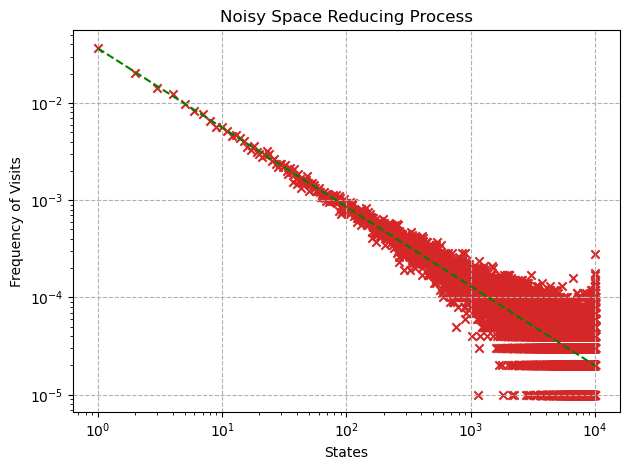

In [112]:
# Present the results
# plt.bar(visits.keys(), visits.values())
plt.plot(x_data, zipf(x_data, *popt), "g--", label=r'fit: C=%5.3f, $\lambda$=%5.3f' % tuple(popt))
plt.scatter(visits.keys(), visits.values(), marker="x", color="tab:red")
plt.xticks(list(visits.keys()))
plt.xlabel("States")
plt.ylabel("Frequency of Visits")
plt.yscale("log")
plt.xscale("log")
plt.grid(True, ls="--")
plt.title("Noisy Space Reducing Process")
plt.tight_layout()
# plt.savefig("noisy_ssr_loglog.png")
plt.show()

In [2]:
# SSR cascade 
# code goes here 
# :) 